### **Métrique d’Évaluation**
La performance du modèle sera mesurée à l'aide de la **Root Mean Squared Error (RMSE)**, définie comme suit :

$$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

Où :
- $y_i$ est la valeur réelle.
- $\hat{y}_i$ est la prédiction.
- $n$ est le nombre total d'observations.

Un RMSE plus faible indique une meilleure performance du modèle.

In [1]:
from dotenv import load_dotenv
import os

load_dotenv()
os.chdir("..")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# 1. Chargement des métriques
reports_dir = Path("outputs/reports")
baseline_df = pd.read_csv(reports_dir/"all_zones_baseline_metrics.csv")
dl_df       = pd.read_csv(reports_dir/"all_zones_dl_metrics.csv")


In [3]:
# 2. Préparation des données (daily)
# 2.1 Pivot baseline daily RMSE
base_daily = baseline_df[["zone"] + 
    [c for c in baseline_df.columns if c.startswith("daily_") and c.endswith("_RMSE")]
].set_index("zone")
base_daily.columns = [col.replace("daily_", "").replace("_RMSE", "") 
                      for col in base_daily.columns]

# 2.2 Pivot DL daily RMSE
dl_daily = (dl_df[dl_df.horizon == "daily"]
            .pivot(index="zone", columns="model", values="RMSE"))

# 2.3 Fusion daily
daily_rmse = base_daily.join(dl_daily, how="inner", lsuffix="_base", rsuffix="")


<Figure size 1200x600 with 0 Axes>

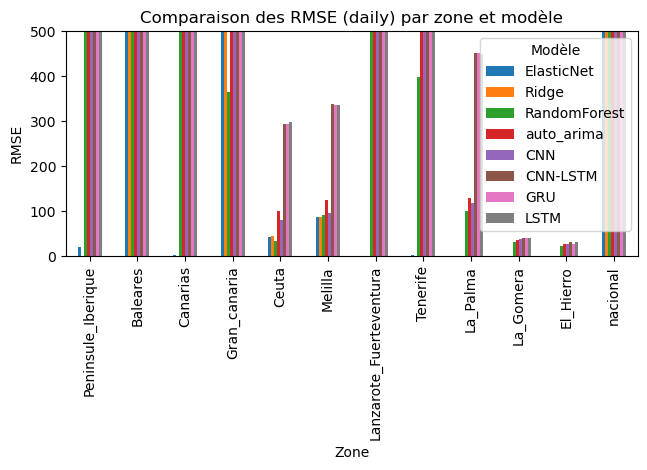

In [20]:
# 3. Visualisation comparative RMSE (daily)
plt.figure(figsize=(12,6))
daily_rmse.plot.bar()
plt.title("Comparaison des RMSE (daily) par zone et modèle")
plt.xlabel("Zone")
plt.ylabel("RMSE")
plt.legend(title="Modèle")
plt.tight_layout()
plt.ylim(0, 500)
plt.show()

In [5]:
# 4. Sélection du meilleur modèle (daily)
best_daily = []
for zone, row in daily_rmse.iterrows():
    best = row.idxmin()
    best_daily.append({"zone": zone, "best_model_daily": best})
best_daily_df = pd.DataFrame(best_daily)
best_daily_df.to_csv(reports_dir / "best_models_by_rmse_daily.csv", index=False)


In [6]:
# 5. Préparation des données (hourly)
# 5.1 Pivot baseline hourly RMSE
base_hourly = baseline_df[["zone"] + 
    [c for c in baseline_df.columns if c.startswith("hourly_") and c.endswith("_RMSE")]
].set_index("zone")
base_hourly.columns = [col.replace("hourly_", "").replace("_RMSE", "") 
                       for col in base_hourly.columns]

# 5.2 Pivot DL hourly RMSE
dl_hourly = (dl_df[dl_df.horizon == "hourly"]
             .pivot(index="zone", columns="model", values="RMSE"))

# 5.3 Fusion hourly
hourly_rmse = base_hourly.join(dl_hourly, how="inner", lsuffix="_base", rsuffix="")


<Figure size 1200x600 with 0 Axes>

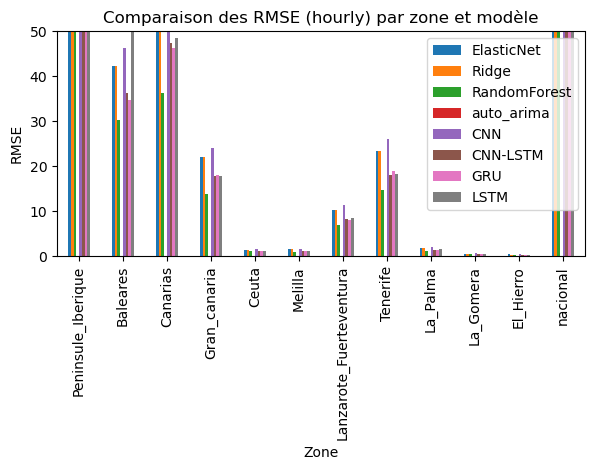

In [17]:
# 6. Visualisation comparative RMSE (hourly)
plt.figure(figsize=(12,6))
hourly_rmse.plot.bar()
plt.title("Comparaison des RMSE (hourly) par zone et modèle")
plt.xlabel("Zone")
plt.ylabel("RMSE")
plt.tight_layout()
plt.ylim(0, 50)
plt.show()


In [8]:
# 7. Sélection du meilleur modèle (hourly)
best_hourly = []
for zone, row in hourly_rmse.iterrows():
    best = row.idxmin()
    best_hourly.append({"zone": zone, "best_model_hourly": best})
best_hourly_df = pd.DataFrame(best_hourly)
best_hourly_df.to_csv(reports_dir / "best_models_by_rmse_hourly.csv", index=False)


In [9]:
# 8. Fusion finale des meilleurs modèles daily & hourly
best_models = best_daily_df.merge(best_hourly_df, on="zone")
best_models.to_csv(reports_dir / "best_models.csv", index=False)

# 9. Affichage du tableau final
best_models

,zone,best_model_daily,best_model_hourly
0,Peninsule_Iberique,Ridge,RandomForest
1,Baleares,Ridge,RandomForest
2,Canarias,Ridge,RandomForest
3,Gran_canaria,RandomForest,RandomForest
4,Ceuta,RandomForest,RandomForest
5,Melilla,ElasticNet,RandomForest
6,Lanzarote_Fuerteventura,Ridge,RandomForest
7,Tenerife,Ridge,RandomForest
8,La_Palma,Ridge,RandomForest
9,La_Gomera,Ridge,RandomForest
